# Task1: Predict Restaurant Ratings

In [1]:
# import necessary models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read csv file
df=pd.read_csv("12.Dataset.csv")

In [5]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [6]:
# drop unwanted columns
df.drop('Restaurant ID',axis=1,inplace=True)

In [7]:
df.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
#chek null values in the dataset
df.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
#fill null values in the dataset
i=df['Cuisines'].mode()[0]
df['Cuisines']=df['Cuisines'].fillna(i)

In [10]:
#check again null values
df.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Address               9551 non-null   object 
 4   Locality              9551 non-null   object 
 5   Locality Verbose      9551 non-null   object 
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9551 non-null   object 
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [12]:
# split object and numeric feature
ob=[i for i in df.columns if df[i].dtypes=='O']
fl=[i for i in df.columns if df[i].dtypes!='O']
print(df[ob].shape)
print(df[fl].shape)

(9551, 13)
(9551, 7)


In [13]:
#find unique value in the object feature
for i in ob:
    g=df[i].unique()
    print(i,":",g)
    print()

Restaurant Name : ['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A���k Kahve' "Walter's Coffee Roastery"]

City : ['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Bras�_lia'
 'Rio de Janeiro' 'S��o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Miller' 'Monroe' 'Montville'
 'Ojo Caliente' 'Orlando' 'Palm Cove' 'Paynesville' 'Penola' 'Pensacola'
 'Phillip Island' 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii'
 'Savannah' 'Singapore' 'Sioux City' 'Tampa Bay' 'Tanunda' 'Trentham East'
 'Vald

In [14]:
ob

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']

In [15]:
# split feature into those with more and frewer unique values
la=[ 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']
ta=['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency']

In [16]:
#Encode the object values
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

for i in la:
    f=LabelEncoder()
    df[i]=f.fit_transform(df[i])
for i in ta:
    t=ce.TargetEncoder()
    df[i]=t.fit_transform(df[i],df['Aggregate rating'])

In [17]:
df

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,2.943973,162,2.947750,2.943973,2.943973,2.943973,121.027535,14.565443,2.943973,1100,3.657067,1,0,0,0,3,4.8,0,1,314
1,2.904941,162,2.947750,2.904941,2.904941,2.904941,121.014101,14.553708,3.036147,1200,3.657067,1,0,0,0,3,4.5,0,1,591
2,2.891930,162,2.995384,2.891930,2.891930,2.891930,121.056831,14.581404,2.891930,4000,3.657067,1,0,0,0,4,4.4,1,5,270
3,2.956984,162,2.995384,2.956984,2.980495,2.980495,121.056475,14.585318,3.286732,1500,3.657067,0,0,0,0,4,4.9,0,1,365
4,2.943973,162,2.995384,2.943973,2.980495,2.980495,121.057508,14.584450,2.887816,1500,3.657067,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,2.852897,208,3.242705,2.852897,2.957588,2.957588,28.977392,41.022793,2.789606,80,3.976842,0,0,0,0,3,4.1,1,5,788
9547,2.865908,208,3.242705,2.865908,2.865908,2.865908,29.041297,41.009847,2.865908,105,3.976842,0,0,0,0,3,4.2,1,5,1034
9548,2.800854,208,3.242705,2.800854,2.834269,2.834269,29.034640,41.055817,2.800854,170,3.976842,0,0,0,0,4,3.7,5,2,661
9549,2.839887,208,3.242705,2.839887,2.834269,2.834269,29.036019,41.057979,2.834269,120,3.976842,0,0,0,0,4,4.0,1,5,901


In [18]:
#find correlation between independent and dependent feature
abs(df.corr()['Aggregate rating'].sort_values(ascending=False))

Aggregate rating        1.000000
Address                 0.981942
Restaurant Name         0.876308
Locality Verbose        0.621933
Locality                0.611629
Cuisines                0.456830
Price range             0.437944
City                    0.408966
Votes                   0.313691
Currency                0.290882
Country Code            0.282189
Has Online delivery     0.225699
Has Table booking       0.189998
Average Cost for two    0.051792
Is delivering now       0.019180
Latitude                0.000516
Longitude               0.116818
Rating text             0.182662
Rating color            0.367054
Switch to order menu         NaN
Name: Aggregate rating, dtype: float64

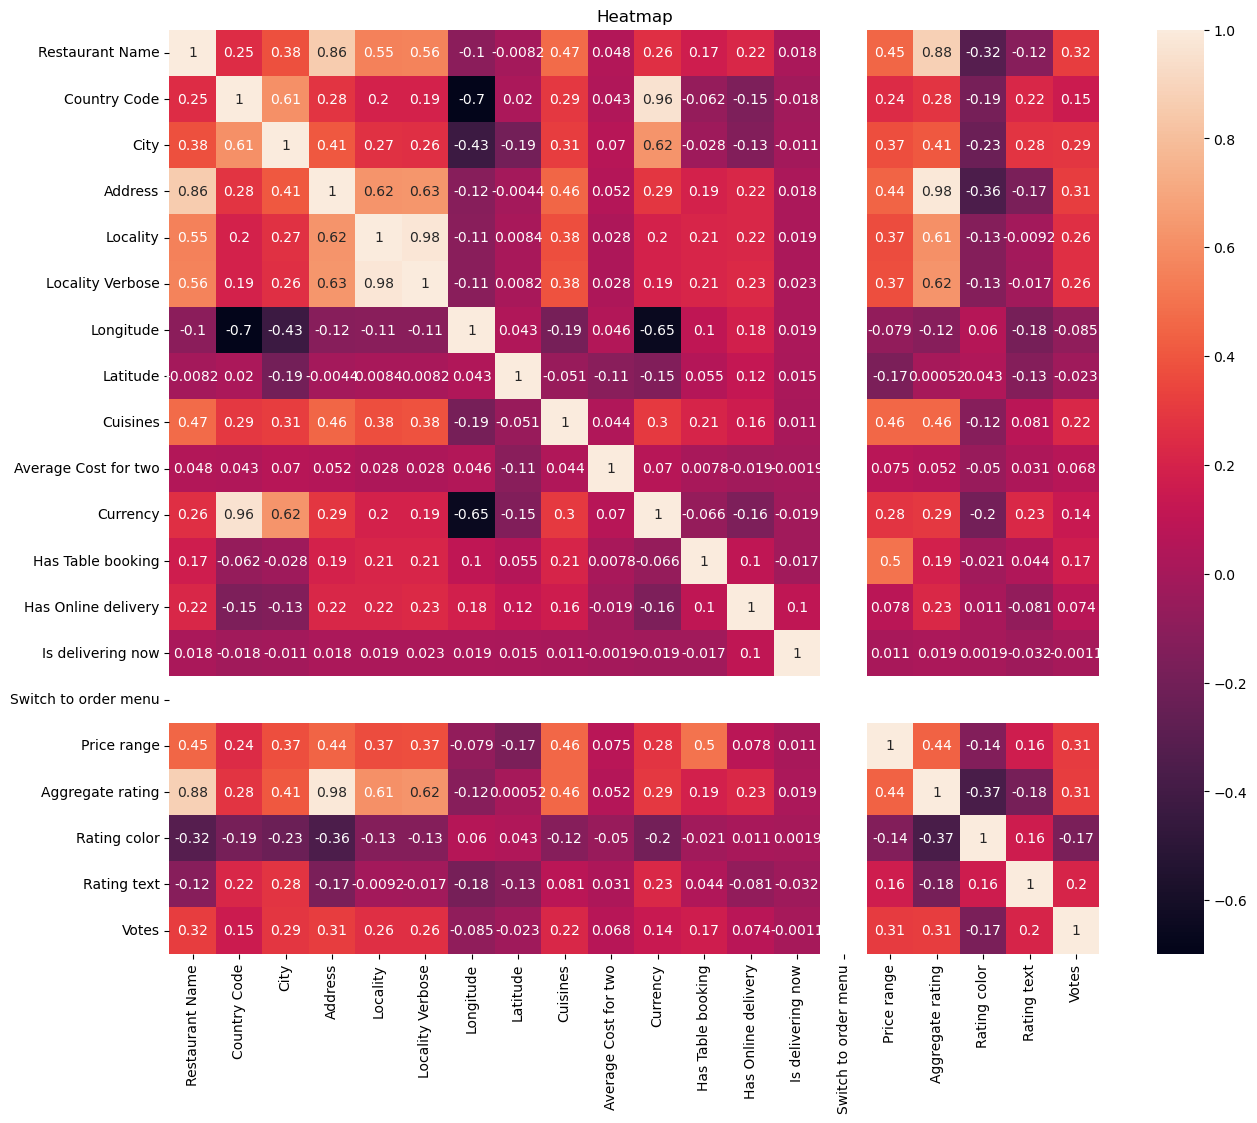

In [19]:
#plot heat map
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap')
plt.show()

In [20]:
df.drop('Switch to order menu',axis=1,inplace=True)

In [21]:
df.shape

(9551, 19)

#### Split Dataset Into Train and Test

In [22]:
#split feature and target variable
X=df.drop('Aggregate rating',axis=1)
y=df['Aggregate rating']


In [24]:
X.shape

(9551, 18)

In [25]:
#split data into traing and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)

In [26]:
X_train.shape

(7163, 18)

In [27]:
#Scale the feature
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.fit_transform(X_test)

#### Build the Model

In [29]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

l=LinearRegression()
l.fit(X_train,y_train)
pre=l.predict(X_test)
mae=mean_absolute_error(pre,y_test)
mse=mean_squared_error(pre,y_test)
r2=r2_score(pre,y_test)
print('mean_absolute_error',":",mae)
print('mean_squared_error',":",mse)
print('r2score',":",r2)

mean_absolute_error : 0.11469215412609352
mean_squared_error : 0.07113346302954364
r2score : 0.9683542400202823


i got mae and mse is low value 
then r2 is high value
overall my linear regression model is performed very well ,i got 96.83%

## Thank you